# Model Validation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Model Capacity
- import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
  - 'Electric.csv' from Github

In [ ]:
#github 에서 바로 파일을 읽어오기 (주의: raw 주소를 사용해야함)
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.info()

# 이 중 하나는 y로 사용될 것이구나!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


- 산점도(surface_area vs. electricity)

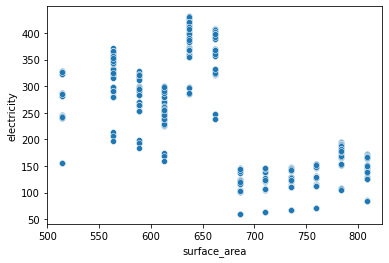

In [ ]:
# input: surface_area, output: electricity
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

### 1) 1차 모델 시각화

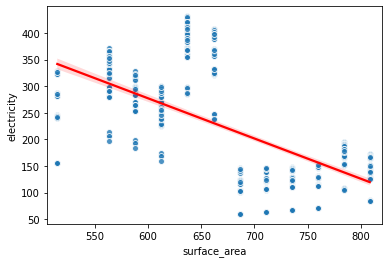

In [ ]:
sns.regplot(x = 'surface_area' , y = 'electricity', data = Elec, 
            line_kws = {'color' : 'red'} ,
            scatter_kws = {'edgecolor' : 'white'}) # 테두리를 하얀색으로 해야 점들 간 구분이 된다
plt.xlim(505, 820)
plt.show()

### 2) 2차 모델 시각화

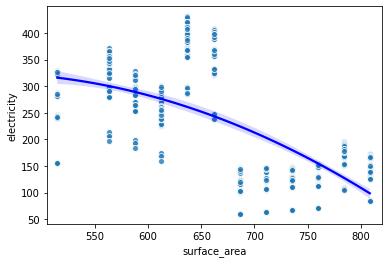

In [ ]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'blue'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 2)
plt.xlim(505, 820)
plt.show()

### 3) 5차 모델 시각화

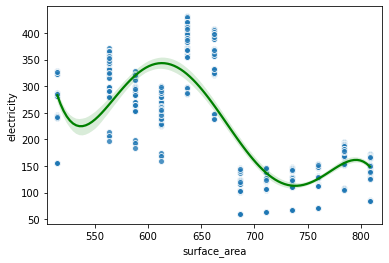

In [ ]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'green'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 5)
plt.xlim(505, 820)
plt.show()

## 4) 9차 모델 시각화

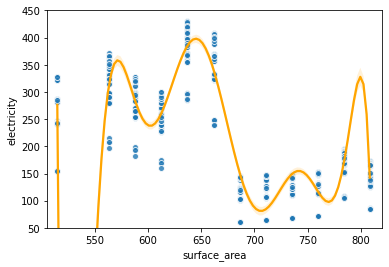

In [ ]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'orange'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 9)

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

## 5) 4개 모델 비교 시각화

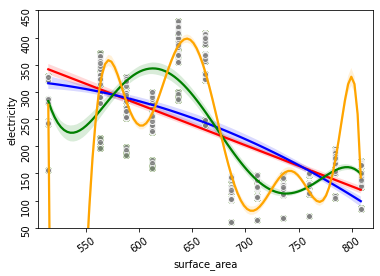

In [ ]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'red'})
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'blue'}, order = 2)
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'green'}, order = 5)
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'orange'}, order = 9 ,
            scatter_kws = {'color' : 'gray' , 'edgecolor' : 'white'})

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

### 6) ipywidgets Package
- interactive graph 만들기 가능 (django 연동 가능)
- reg_plot() 선언

In [ ]:
def reg_plot(x) :
  sns.regplot(x = 'surface_area' ,
              y = 'electricity' ,
              data = Elec ,
              order = x ,
              line_kws = {'color' : 'red'} ,
              scatter_kws = {'edgecolor' : 'white'})
  
  plt.xlim(505, 820)
  plt.ylim(50, 450)
  plt.show()

- interact() 실행

In [ ]:
from ipywidgets import interact

order = [1, 2, 5, 9]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9), value=1), Output()), _dom_classes=('widg…

<function __main__.reg_plot>

## 2. Training Error
- import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
- 'Electric.csv' from Github

In [ ]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1) 1차 모델 Training Error
- X_train and y_train

In [ ]:
# 보통 X,y 로 표기

In [ ]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
# LinearRegression class import

Model_1 = LinearRegression() # 객체 생성
Model_1.fit(X_train, y_train)
# fit: x, y 를 주어 w,b를 계산해냄 (행렬적 방식을 통해) - 기울기가 0인 지점을 찾아냄(학습)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


- y_hat(예측값) 생성

In [ ]:
y_hat_1 = Model_1.predict(X_train) # predict: 학습된 함수를 데이터에 적용, y_hat을 뽑아냄

len(y_hat_1) # X가 768개이므로 768개의 y_hat이 만들어짐

768

- MSE(Mean Squared Error) 계산

In [ ]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2) # 768개 오차의 제곱의 평균을 계산해냄
TR_Err_1

5763.983779426347

### 2) 5차 모델 Training Error
  - X 다항차수 변환
    - (768, 1) 새 (768, 5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False) # degree: 만들 차원 선택
PX_5 = poly.fit_transform(X_train)
# fit_transform 에 x 값을 줘야함

In [ ]:
PX_5 # (768, 1) 에서 (768, 5) 개가 됨


array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [ ]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

- 5차 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

# 1차 모델과 같이 linear model에 넣어줌 (모델에 집어넣는 방법은 같음)
# linear regression 은 기본적으로 1차 함수,
# 5개를 넣어주면, 5차 함수가 됨
# w 5개, b 1개, 총 6개 파라미터를 학습시키게 됨

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
np.set_printoptions(suppress = True, precision = 10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


- y_hat(예측값) 생성

In [ ]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

- MSE(Mean Squared Error) 계산
  - 정량적으로 측정하여 선택


In [ ]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328606075

### 3) 9차 모델 Training Error
- X 다항차수 변환
  - (768, 1) to (768, 9)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [ ]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


- y_hat(예측값) 생성

In [ ]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

- MSE(Mean Squared Error) 계산

In [ ]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908150374

### 4) 3개 모델 Training Error 비교

In [ ]:
print('1차 모델: ', TR_Err_1)
print('5차 모델: ', TR_Err_5)
print('9차 모델: ', TR_Err_9)

1차 모델:  5763.983779426347
5차 모델:  4177.726328606075
9차 모델:  4086.7199908150374


### 5) 잔차(Residual) 시각화
  - 통계용어로는 오차를 잔차(Residual)이라고 한다
  - 1차 모델

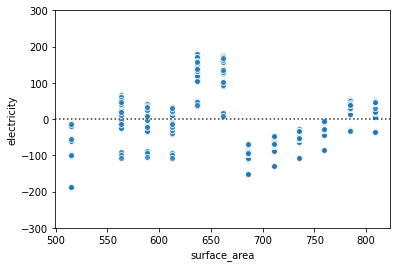

In [ ]:
sns.residplot(x = 'surface_area' ,
              y = 'electricity' ,
              data = Elec ,
              order = 1 ,
              scatter_kws = {'edgecolor' : 'white'})

plt.ylim(-300, 300)
plt.show()

- 5차 모델

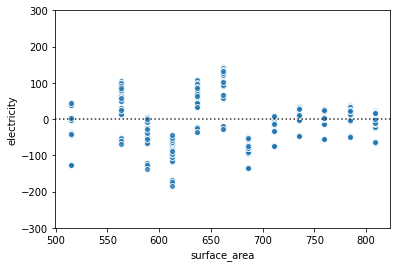

In [ ]:
sns.residplot(x = 'surface_area' ,
              y = 'electricity' ,
              data = Elec ,
              order = 5 ,
              scatter_kws = {'edgecolor' : 'white'})

plt.ylim(-300, 300)
plt.show()

- 9차 모델

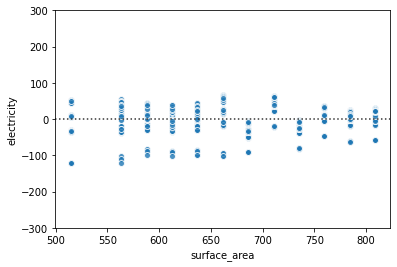

In [ ]:
sns.residplot(x = 'surface_area' ,
              y = 'electricity' ,
              data = Elec ,
              order = 9 ,
              scatter_kws = {'edgecolor' : 'white'})

plt.ylim(-300, 300)
plt.show()

## 2. Testing Error
- import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
  - 'Electric.csv' from Github

In [ ]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.shape

(768, 9)

### 1) Train_data vs. Test_data

#### (1) DataFrame Split
- 8:2 Split(614: 154)
- 80% Train_df & 20% Test_df

In [ ]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, random_state = 2045)

# 데이터프레임을 두개로 나눔(TR_Elec , TE_Elec) 
# split은 랜덤하게 되므로 random_state 값을 줌 (실험의 복원)

In [ ]:
TR_Elec.shape, TE_Elec.shape # (614, 9) (154, 9)

((614, 9), (154, 9))

- 80% TR_Elec DataFrame

In [ ]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


- 20% TE_Elec DataFrame

In [ ]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


#### (2) Array Split
- X_train, X_test & y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']] ,
                                                    Elec['electricity'] ,
                                                    test_size = 0.2 ,
                                                    random_state = 2045)

# 데이터프레임에서 X, y만 array로 뽑아냄
# random_state을 똑같이 줬으므로 위와 같은 값들이 뽑히게 된다

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# (614, 1) , (614, ) , (154, 1) , (154,)

((614, 1), (614,), (154, 1), (154,))

- 80% X_train Array

In [ ]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


- 80% y_train Array

In [ ]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

#### (3) Distribution Visualization
- train_data가 골고루 분포되어 있어야 제대로 학습한다
- 편향됨이 없이 데이터의 모양대로 학습하려면 random split 해야한다


- Train Data

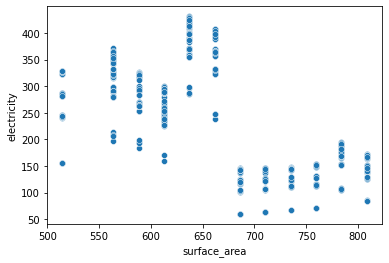

In [ ]:
sns.scatterplot(TR_Elec['surface_area'] , TR_Elec['electricity'])
plt.show()

- Test Data

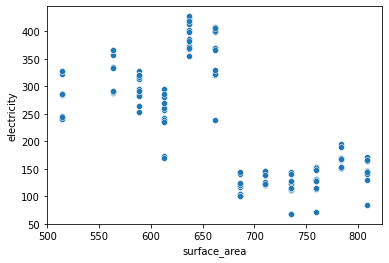

In [ ]:
sns.scatterplot(TE_Elec['surface_area'] , TE_Elec['electricity'])
plt.show()

### 2) 1차 모델 Testing Error
- Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train) # fit은 train 데이터셋으로

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
y_hat_1 = Model_1.predict(X_test) # predict: test 데이터셋으로

y_hat_1.shape

(154,)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

### 3) 5차 모델 Testing Error
- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
PX_5_TE = poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

# metric: 측정 항목

TE_Err_5 = mean_squared_error(y_test, y_hat_5)

TE_Err_5

4330.604566409499

### 4) 9차 모델 Testing Error
- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias= False)
PX_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)

TE_Err_9

4238.689067137633

### 5) 3개 모델 Testing Error 비교

In [81]:
print('1차 모델: ', TE_Err_1)
print('5차 모델: ', TE_Err_5)
print('9차 모델: ', TE_Err_9)

1차 모델:  6044.176547629271
5차 모델:  4330.604566409499
9차 모델:  4238.689067137633


## 4. Validation Approach
- import Packages

In [82]:
import pandas as pd

- pandas DataFrame

In [83]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


Train vs. Validation vs. Test
- 6:2:2 split(462:153:153)

sklearn Package 사용
- train_test_split()

- 20% Test_Data(153)

In [84]:
from sklearn.model_selection import train_test_split

# remain 으로 만듦
X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']] ,
                                                      Elec['electricity'] ,
                                                      test_size = int(len(Elec) * 0.2) ,
                                                      random_state = 2045)

# test_size = int(len(Elec) * 0.2) : 명시적으로 int로 지정함
# test로 153개가 빠지고 나머지는 remain으로 할당
# 원본의 20프로가 되도록 만든 것
# 통상은 같게 하고, 조금씩 조정해가며 모델링함

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


- 60% Train_Data(462) & 20% Validation_Data(153)

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size = int(len(Elec) * 0.2) ,
                                                      random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


## 1) 5차 모델 Validation Error
- Train_Data로 모델 생성

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5 , include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [88]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [89]:
PX_5_VD = poly.fit_transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [90]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)

MSE_5

4136.4312593408395

## 2) 9차 모델 Validation Error
- Train_Data로 모델 생성 

In [91]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [92]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
PX_9_VD = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX_9_VD)

In [94]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124909912

## 3) 2개 모델 Validation Error 비교

In [96]:
print('5차 모델 MSE_5: ' , MSE_5)
print('9차 모델 MSE_9: ' , MSE_9)

# 5차 모델보다 9차모델이 성능이 더 좋음

5차 모델 MSE_5:  4136.4312593408395
9차 모델 MSE_9:  3955.9733124909912


## 4) 최종 9차 모델을 Test_Data에 적용
- Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [97]:
PX_9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX_9_TE))
# 성능이 더 좋은 9차모델에 test data에 넣어서 mse를 계산
# 미래에 만날 오차와 비슷할 거라고 추측하는 것

4220.88573210769